# Bootstrap Explanations with the SAINT DNN and Spambase Dataset

**Model:** https://github.com/somepago/saint

**Dataset:** https://search.r-project.org/CRAN/refmans/bayesreg/html/spambase.html

## Load the data

In [76]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from bootstrap import *

In [77]:
X_test_df = pd.read_csv("datasets/spambase/X_test.csv")
X_valid_df = pd.read_csv("datasets/spambase/X_valid.csv")
X_df = pd.concat([X_test_df, X_valid_df])
feature_names = list(X_df.columns)
num_features = len(feature_names)
X_test = X_test_df.to_numpy()
X_val = X_valid_df.to_numpy()
X = X_df.to_numpy()
y_test = np.load("datasets/spambase/y_pred_prob_test.npy") 
y_valid = np.load("datasets/spambase/y_pred_prob_val.npy") 
y = np.concatenate([y_test, y_valid])

In [78]:
X.shape, y.shape

((1613, 57), (1613,))

In [79]:
print(feature_names)

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_freq_%24', 'char_freq_%

In [80]:
query_idx = 0
query = X[query_idx,:]
print("Example email: \n")
for f in range(num_features):
    print(f"{feature_names[f]}: {query[f]}")
    
print("\nSAINT probability of spam: ", y[query_idx])

Example email: 

word_freq_make: 0.21
word_freq_address: 0.28
word_freq_all: 0.5
word_freq_3d: 0.0
word_freq_our: 0.14
word_freq_over: 0.28
word_freq_remove: 0.21
word_freq_internet: 0.07
word_freq_order: 0.0
word_freq_mail: 0.94
word_freq_receive: 0.21
word_freq_will: 0.79
word_freq_people: 0.65
word_freq_report: 0.21
word_freq_addresses: 0.14
word_freq_free: 0.14
word_freq_business: 0.07
word_freq_email: 0.28
word_freq_you: 3.47
word_freq_credit: 0.0
word_freq_your: 1.59
word_freq_font: 0.0
word_freq_000: 0.43
word_freq_money: 0.43
word_freq_hp: 0.0
word_freq_hpl: 0.0
word_freq_george: 0.0
word_freq_650: 0.0
word_freq_lab: 0.0
word_freq_labs: 0.0
word_freq_telnet: 0.0
word_freq_857: 0.0
word_freq_data: 0.0
word_freq_415: 0.0
word_freq_85: 0.0
word_freq_technology: 0.0
word_freq_1999: 0.07
word_freq_parts: 0.0
word_freq_pm: 0.0
word_freq_direct: 0.0
word_freq_cs: 0.0
word_freq_meeting: 0.0
word_freq_original: 0.0
word_freq_project: 0.0
word_freq_re: 0.0
word_freq_edu: 0.0
word_freq_ta

## Generate explanations with BootstrapTabularExplainer

In [81]:
# Specify parameters
M = 150  # neighborhood size
K = 2    # local polynomial degree 

In [82]:
samples_in = np.copy(X)
samples_out = y # probabilities predicted by the model

# Map continuous features to the deltas we should use to compute function differences
deltas = {i:5.0 for i in range(num_features)}
deltas[num_features-3] = 15.0
deltas[num_features-2] = 65.0
deltas[num_features-1] = 340.0

bte = BootstrapTabularExplainer(data=samples_in, 
                                model_outputs=samples_out, 
                                mode='classification', 
                                feature_names=feature_names, 
                                categorical_features=[],
                                explanation_type='diffs',
                                deltas=deltas)


Local model explanation (# neighbors=150, polynomial degree=2, # parameters=1711, R-squared=1.00000): 
Bootstrap method:  percentile


Feature:  word_freq_make = 0.21
Importance score:  -0.00337
Bootstrap confidence interval:  [-0.02894, 0.02561],  Width=0.05454


Feature:  word_freq_address = 0.28
Importance score:  0.91551
Bootstrap confidence interval:  [-0.00984, 1.00000],  Width=1.00984


Feature:  word_freq_all = 0.5
Importance score:  0.00127
Bootstrap confidence interval:  [-0.00210, 0.05921],  Width=0.06131


Feature:  word_freq_3d = 0.0
Importance score:  -0.00234
Bootstrap confidence interval:  [-0.17933, 0.06598],  Width=0.24531


Feature:  word_freq_our = 0.14
Importance score:  -0.00318
Bootstrap confidence interval:  [-0.04884, 0.02651],  Width=0.07535


Feature:  word_freq_over = 0.28
Importance score:  -0.00770
Bootstrap confidence interval:  [-0.05255, 0.00328],  Width=0.05583


Feature:  word_freq_remove = 0.21
Importance score:  0.00930
Bootstrap confidence interva

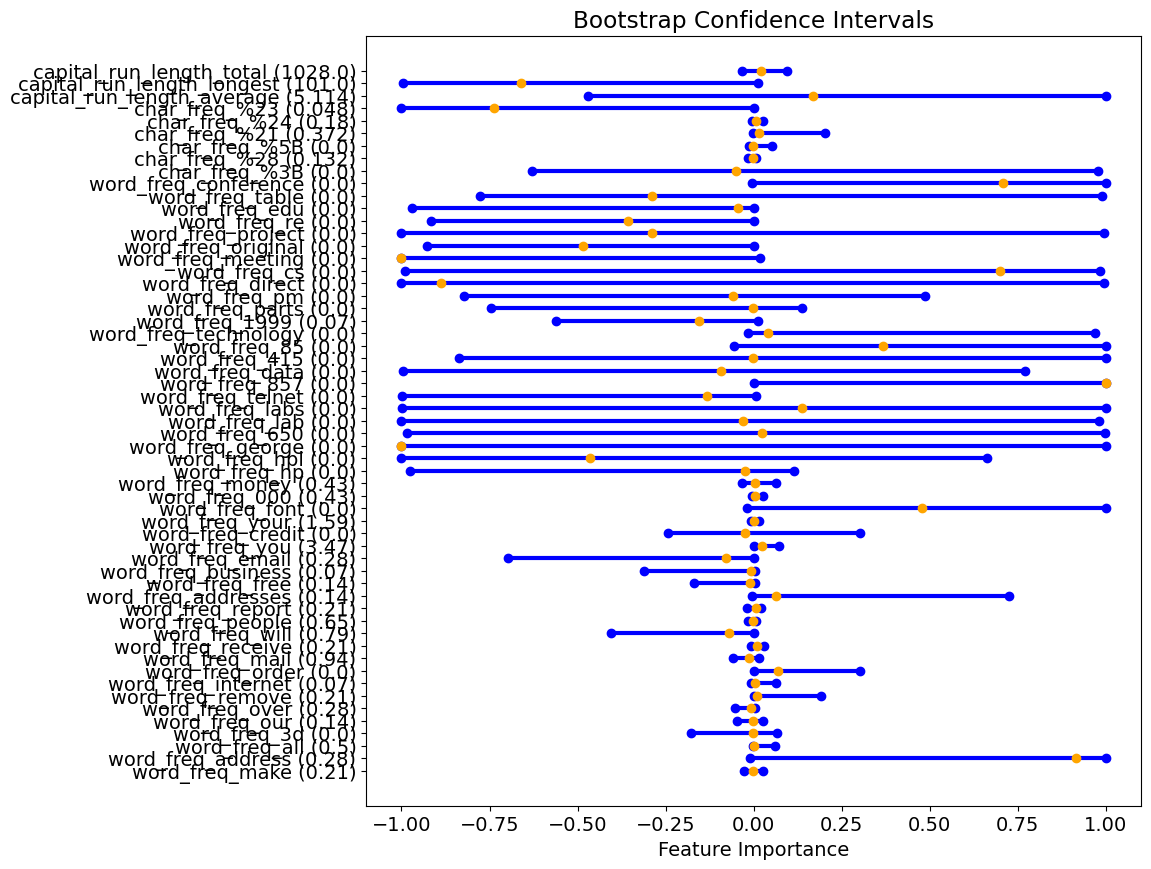

In [8]:
explanation = bte.explain_instance(query, m=M, k=K, verbose=True, with_confidence=True, boot_ratio=0.9)

## Meta explanations

In [85]:
# Construct explanations for all points in the dataset (takes a while)

all_explanations = [None for i in range(len(X_val))]

for i in range(len(X_val)):
    print(i, end='\r')
    query = X_val[i,:]
    explanation = bte.explain_instance(query, m=M, k=K, verbose=False, with_confidence=True, boot_ratio=0.9)
    all_explanations[i] = explanation

In [91]:
# Compute average feature importances scores and average interval widths over all points in the dataset
num_explanations = len(all_explanations)
scores = [0 for i in range(num_features)]
widths = [0 for i in range(num_features)]

for explanation in all_explanations:
    for i in range(len(explanation)):
        scores[i] += np.abs(explanation[i]['importance'])/num_explanations
        widths[i] += (explanation[i]['upper_confidence'] - explanation[i]['lower_confidence'])/num_explanations

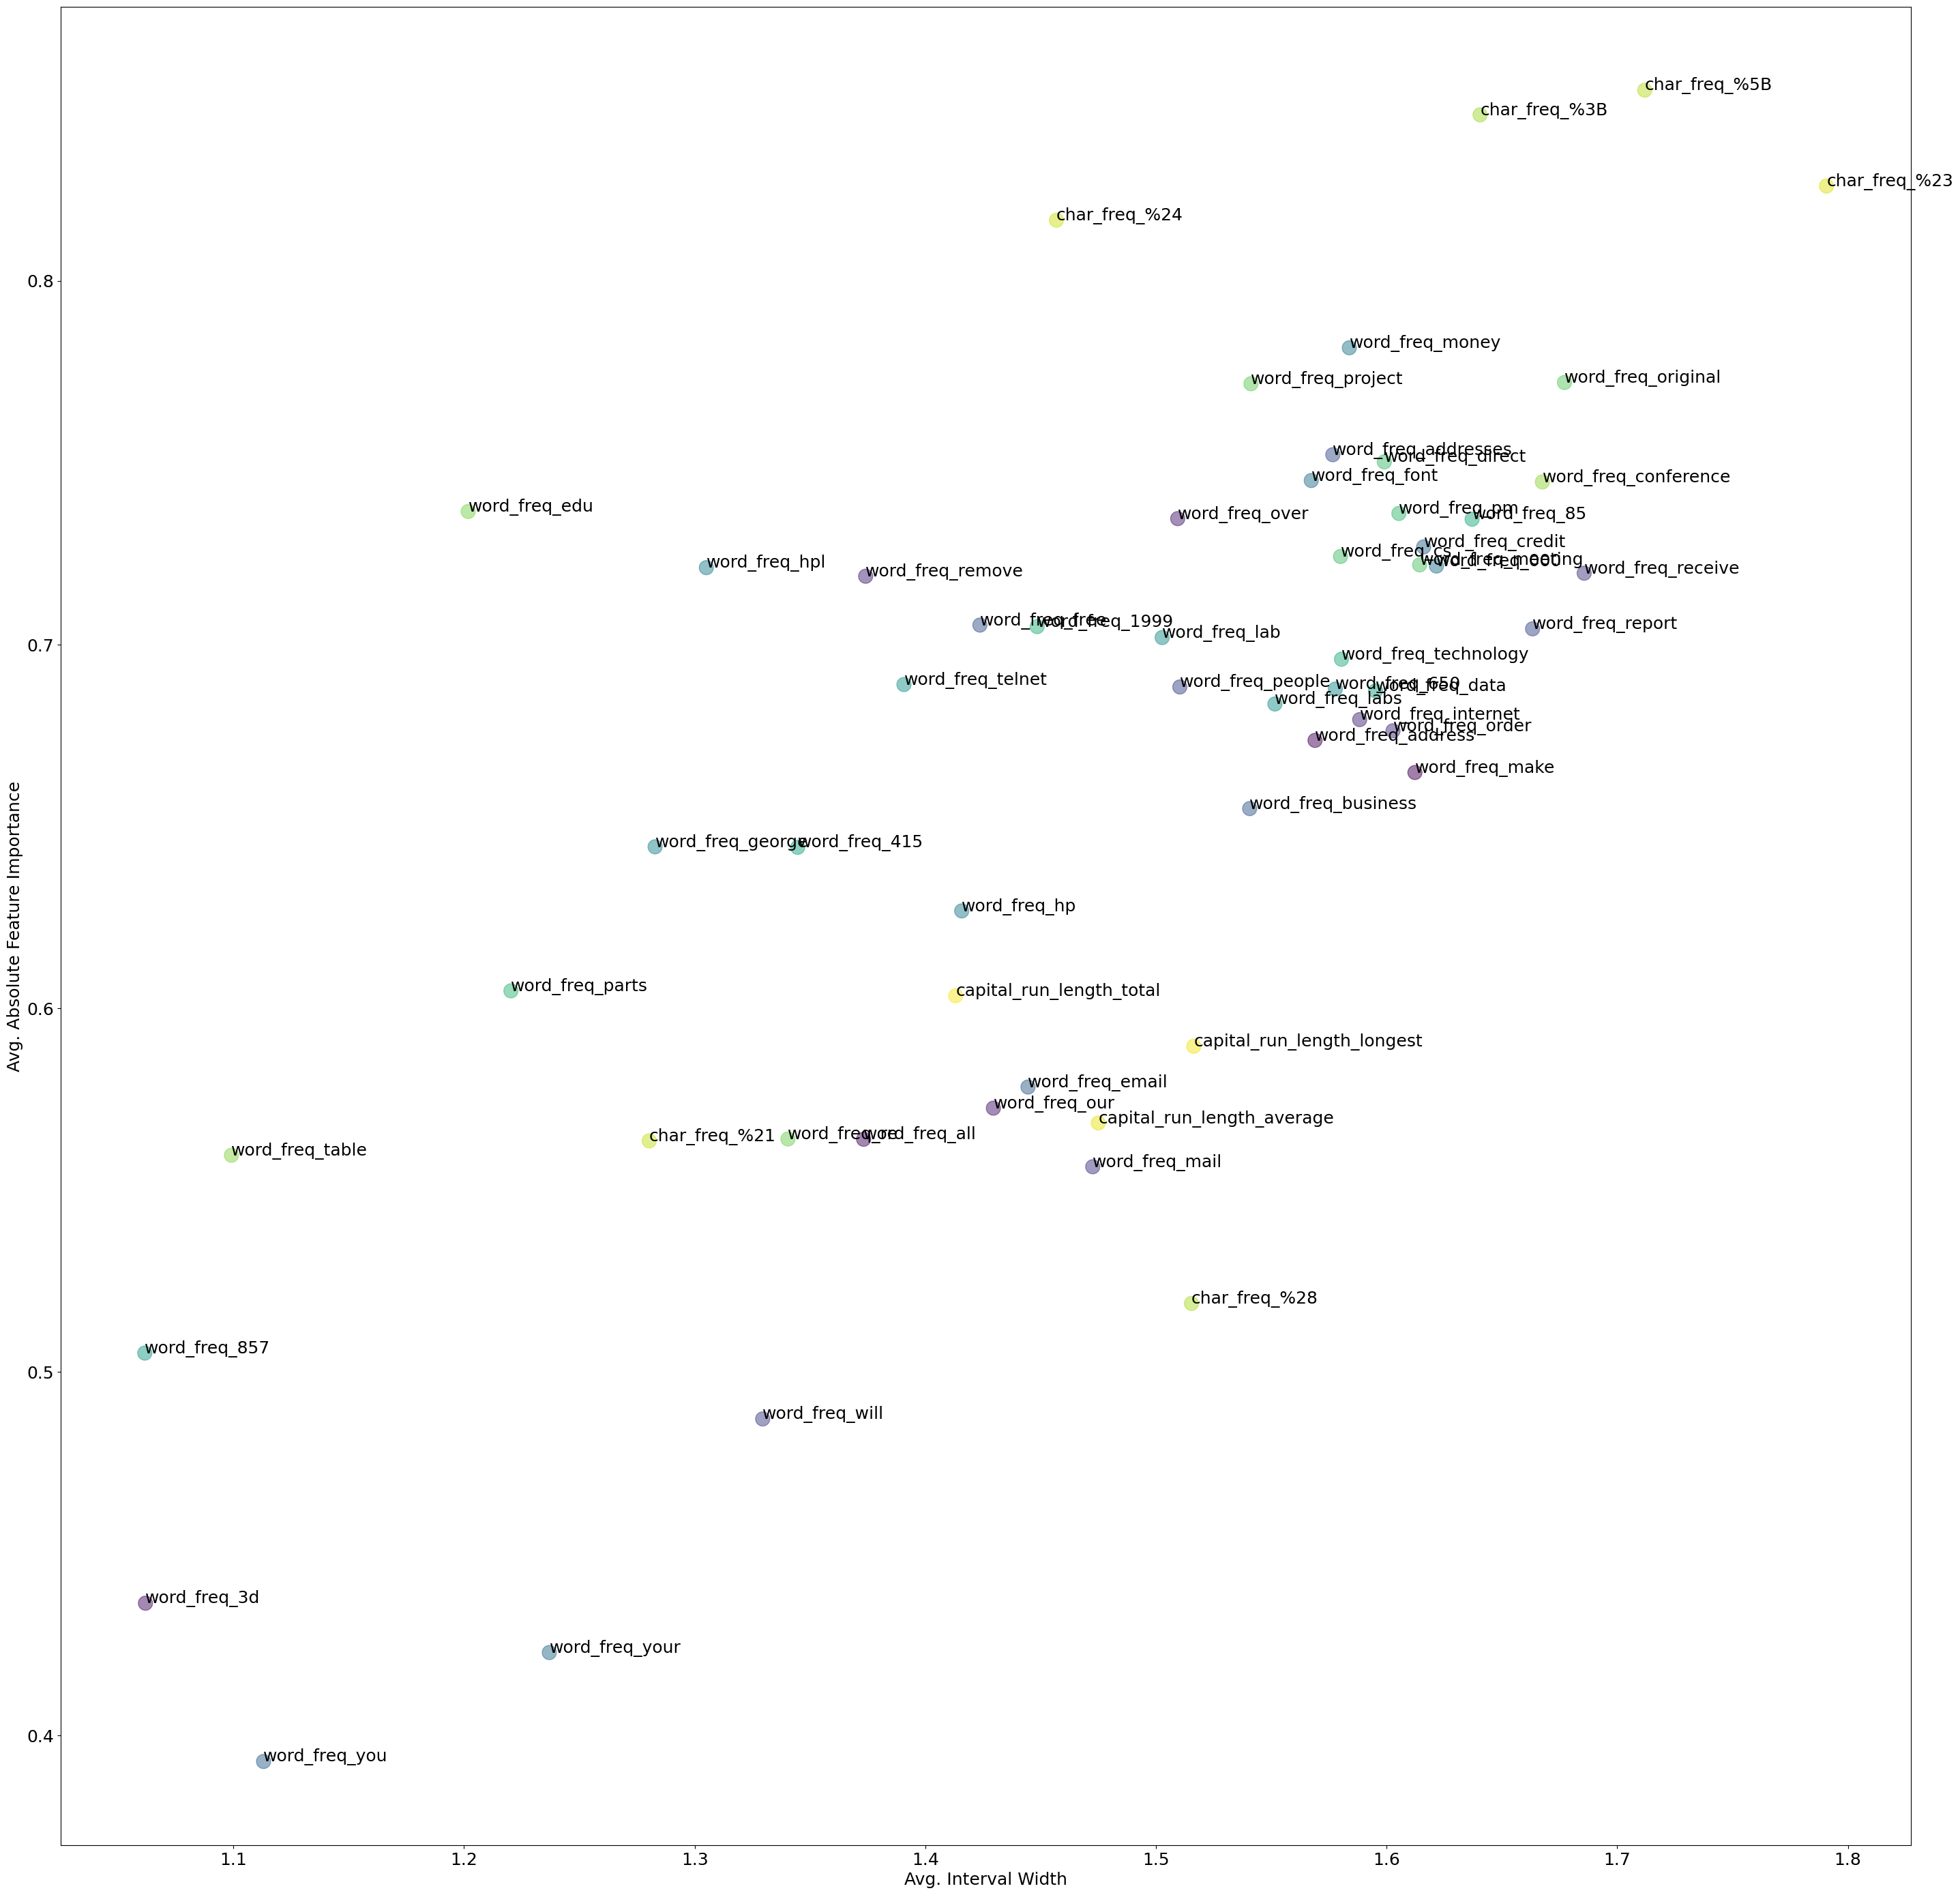

In [120]:
# Scatterplot of avg. feature importances and avg. interval widths
area = (30 * 0.5)**2  
colors = np.linspace(0,1,num_features)
fig, ax = plt.subplots()
ax.scatter(widths, scores, s=area, c=colors, alpha=0.5)
for i, txt in enumerate(feature_names):
    ax.annotate(txt, (widths[i], scores[i]))
plt.xlabel("Avg. Interval Width")
plt.ylabel("Avg. Absolute Feature Importance")
fig.set_figwidth(35)
fig.set_figheight(35)
plt.show()

### Plot in a more readable way

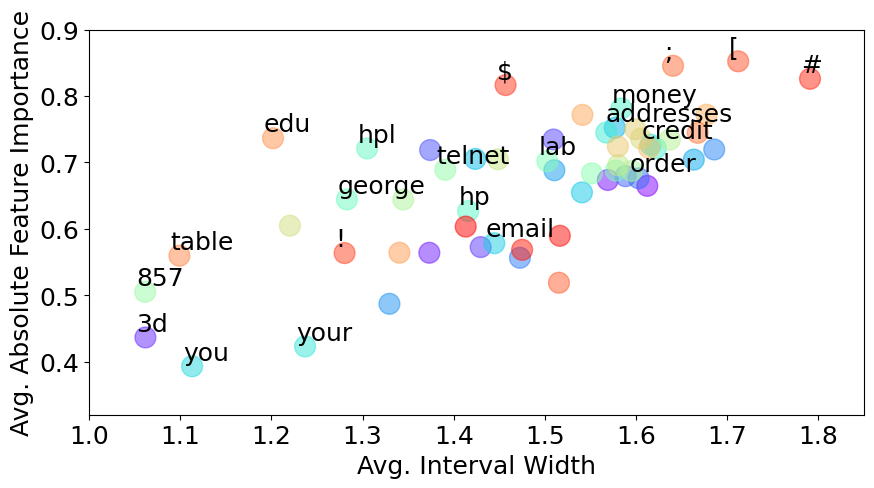

In [131]:
import matplotlib.cm as cm
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 5)

# Scatterplot of avg. feature importances and avg. interval widths
area = (30 * 0.5)**2  
colors = cm.rainbow(np.linspace(0, 1, num_features))
fig, ax = plt.subplots()
ax.scatter(widths, scores, s=area, c=colors, alpha=0.5)
for i, txt in enumerate(feature_names):
    if txt=='char_freq_%3B':
        ax.annotate(";", (widths[i]-0.01, scores[i]+0.01))
    if txt=='char_freq_%5B':
        ax.annotate("[", (widths[i]-0.01, scores[i]+0.01))
    if txt=='char_freq_%21':
        ax.annotate("!", (widths[i]-0.01, scores[i]+0.01))
    if txt=='char_freq_%23':
        ax.annotate("#", (widths[i]-0.01, scores[i]+0.01))
    if txt=='char_freq_%24':
        ax.annotate("$", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_money':
        ax.annotate("money", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_edu':
        ax.annotate("edu", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_857':
        ax.annotate("857", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_credit':
        ax.annotate("credit", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_order':
        ax.annotate("order", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_addresses':
        ax.annotate("addresses", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_hpl':
        ax.annotate("hpl", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_hp':
        ax.annotate("hp", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_you':
        ax.annotate("you", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_your':
        ax.annotate("your", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_3d':
        ax.annotate("3d", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_email':
        ax.annotate("email", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_table':
        ax.annotate("table", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_george':
        ax.annotate("george", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_lab':
        ax.annotate("lab", (widths[i]-0.01, scores[i]+0.01))
    if txt=='word_freq_telnet':
        ax.annotate("telnet", (widths[i]-0.01, scores[i]+0.01))
plt.xlabel("Avg. Interval Width")
plt.ylabel("Avg. Absolute Feature Importance")
plt.xlim([1.0, 1.85])
plt.ylim([0.32,0.9])
plt.savefig('figs/saint-spambase.png', bbox_inches='tight')
plt.show()